# Problem: Predict House prices

## Data collection

### Unzip data

In [4]:
import zipfile
import os

# Define the path to the ZIP file and the extraction directory
zip_path = 'dataset/house_dataset.zip'
extract_path = 'dataset'

# Ensure the extraction directory exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset using zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understand data

| Column Name        | Data Type | Description                                                                     |
| ------------------ | --------- | ------------------------------------------------------------------------------- |
| `price`            | int64     | Selling price of the house.                                            |
| `area`             | int64     | Total area of the house (in square feet).                                       |
| `bedrooms`         | int64     | Number of bedrooms in the house.                                                |
| `bathrooms`        | int64     | Number of bathrooms in the house.                                               |
| `stories`          | int64     | Number of stories (floors) in the house.                                        |
| `mainroad`         | object    | Whether the house is located on a main road (`yes`/`no`).                       |
| `guestroom`        | object    | Whether the house has a guestroom (`yes`/`no`).                                 |
| `basement`         | object    | Whether the house includes a basement (`yes`/`no`).                             |
| `hotwaterheating`  | object    | Whether the house has hot water heating (`yes`/`no`).                           |
| `airconditioning`  | object    | Whether the house has air conditioning (`yes`/`no`).                            |
| `parking`          | int64     | Number of car parking spaces available.                                         |
| `prefarea`         | object    | Whether the house is in a preferred residential area (`yes`/`no`).              |
| `furnishingstatus` | object    | Furnishing level of the house: `furnished`, `semi-furnished`, or `unfurnished`. |


In [7]:
import pandas as pd


data_path = "dataset/Housing.csv"
dataframe = pd.read_csv(data_path)
print(dataframe.shape)

(545, 13)


### Understanding continuous and categorical features

In [ ]:
# column name to predict
target = ["price"]

# select continuous variables
continuous_variables = ["area", "bedrooms", "bathrooms", "stories", "parking"]

# select categorical variables
categorical_variables = ["mainroad", "guestroom", "basement", "hotwaterheating",
                         "airconditioning", "prefarea", "furnishingstatus"]


### Check missing values

In [8]:
missing = dataframe.isnull().sum()
missing[missing > 0]

,0


### Identify outliers

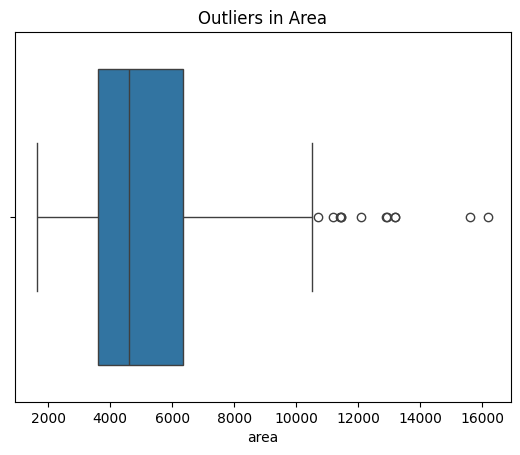

(538, 13)


In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Visualize a common column for outliers
sns.boxplot(x=dataframe['area'])
plt.title("Outliers in Area")
plt.show()

# Remove outliers using Z-score
z = np.abs((dataframe['area'] - dataframe['area'].mean()) / dataframe['area'].std())
df = dataframe[z < 3]
print(df.shape)

### Process continuous features

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize continuous features
continuous = ['price', 'area']
scaler = StandardScaler()
df[continuous] = scaler.fit_transform(df[continuous])
df[continuous].head()

<ipython-input-10-b35116c53ec0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[continuous] = scaler.fit_transform(df[continuous])


,price,area
0,4.633070,1.227196
1,4.064794,2.020887
2,4.064794,2.536271
3,4.045851,1.268427
4,3.610173,1.227196


## Process categorical features

In [11]:
# Binary columns (yes/no to 1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']

df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode furnishing status
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df.head()

<ipython-input-11-006a5c4f2c84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.633070,1.227196,4,2,3,1,0,0,0,1,2,1,False,False
1,4.064794,2.020887,4,4,4,1,0,0,0,1,3,0,False,False
2,4.064794,2.536271,3,2,2,1,0,1,0,0,2,1,True,False
3,4.045851,1.268427,4,2,2,1,0,1,0,1,3,1,False,False
4,3.610173,1.227196,4,1,2,1,1,1,0,1,2,0,False,False


In [12]:
print("=== DATASET INFO ===")
print(f"Data shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")
print("\n=== DESCRIPTIVE STATISTICS ===\n")
print(df.describe())

print("\n=== MISSING VALUES ===\n")
print(df.isnull().sum())

print("\n=== DATA TYPES ===\n")
print(df.dtypes)

=== DATASET INFO ===
Data shape: (538, 14)
Available columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

=== DESCRIPTIVE STATISTICS ===

              price          area    bedrooms   bathrooms     stories  \
count  5.380000e+02  5.380000e+02  538.000000  538.000000  538.000000   
mean   5.282846e-17  1.056569e-16    2.960967    1.284387    1.810409   
std    1.000931e+00  1.000931e+00    0.735101    0.498581    0.870221   
min   -1.617967e+00 -1.746567e+00    1.000000    1.000000    1.000000   
25%   -7.087249e-01 -7.552267e-01    2.000000    1.000000    1.000000   
50%   -2.219017e-01 -2.725699e-01    3.000000    1.000000    2.000000   
75%    5.414824e-01  6.796013e-01    3.000000    2.000000    2.000000   
max    4.633070e+00  3.309346e+00    6.000000    4.000000    4.000000   

         mainroad   guestroo

# **After Data Exploration, Now Data Visualization **

"A picture is worth a thousand words"

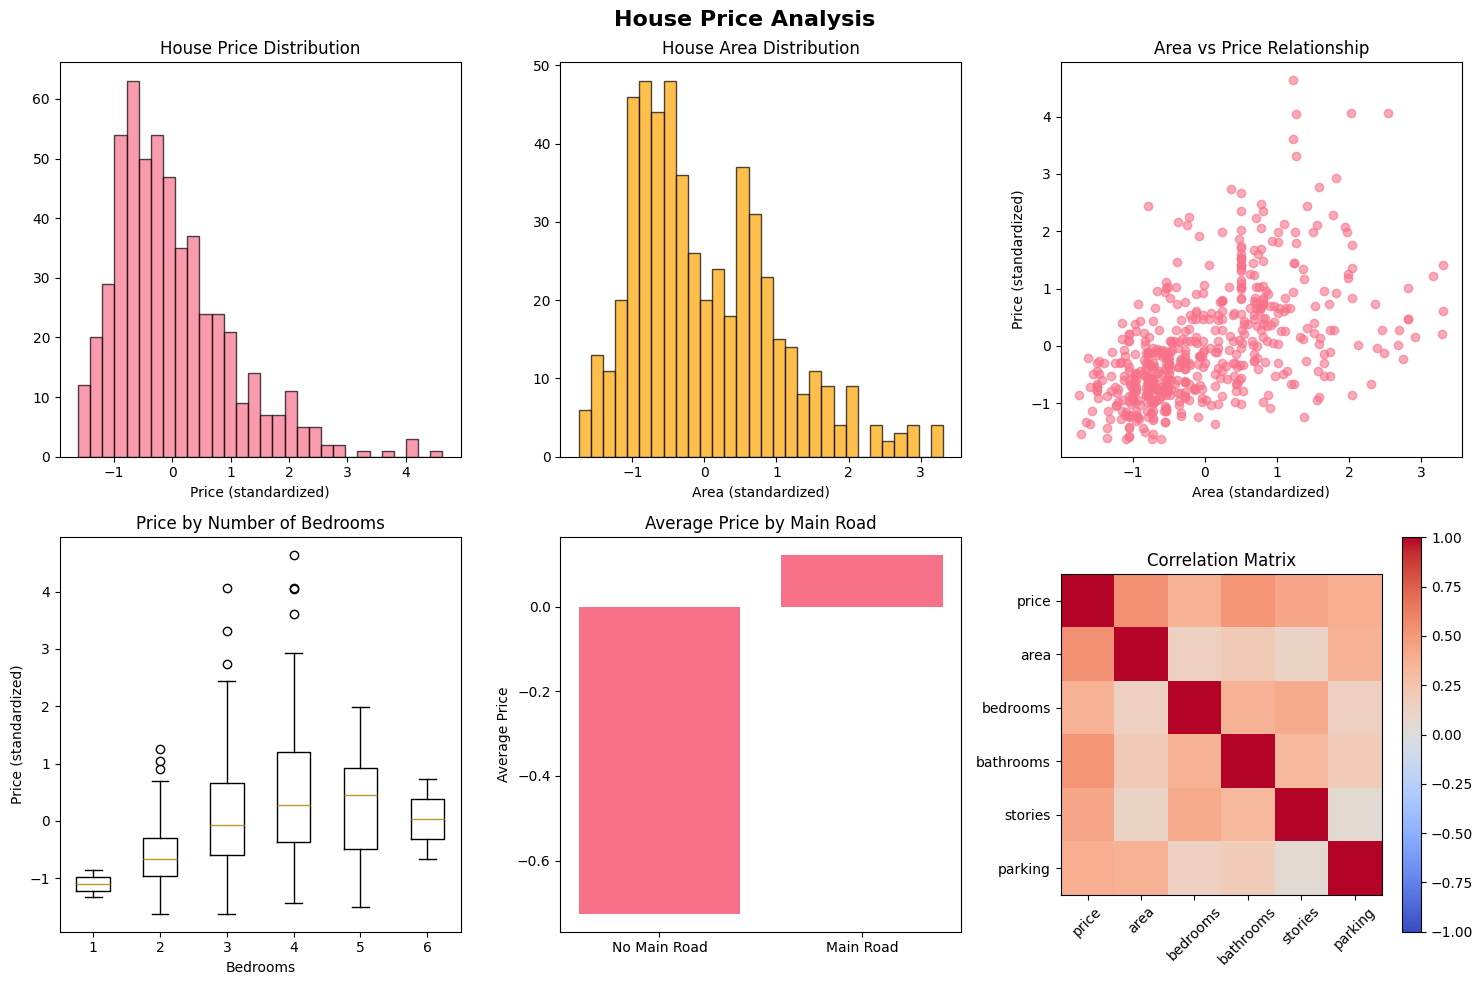

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("House Price Analysis", fontsize=16, fontweight='bold')

# Price Distribution (Target Variable)
axes[0, 0].hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('House Price Distribution')
axes[0, 0].set_xlabel('Price (standardized)')

# Area Distribution
axes[0, 1].hist(df['area'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('House Area Distribution')
axes[0, 1].set_xlabel('Area (standardized)')

# Scatter plot price vs area
axes[0, 2].scatter(df['area'], df['price'], alpha=0.6)
axes[0, 2].set_title('Area vs Price Relationship')
axes[0, 2].set_xlabel('Area (standardized)')
axes[0, 2].set_ylabel('Price (standardized)')

# Box plot for bedrooms
axes[1, 0].boxplot([df[df['bedrooms']==i]['price'].dropna() for i in sorted(df['bedrooms'].unique())])
axes[1, 0].set_title('Price by Number of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Price (standardized)')

# Bar plot for categorical feature
mainroad_price = df.groupby('mainroad')['price'].mean()
axes[1, 1].bar(['No Main Road', 'Main Road'], mainroad_price.values)
axes[1, 1].set_title('Average Price by Main Road')
axes[1, 1].set_ylabel('Average Price')

# Correlation heatmap
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
corr_matrix = df[numeric_cols].corr()
im = axes[1, 2].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 2].set_xticks(range(len(numeric_cols)))
axes[1, 2].set_yticks(range(len(numeric_cols)))
axes[1, 2].set_xticklabels(numeric_cols, rotation=45)
axes[1, 2].set_yticklabels(numeric_cols)
axes[1, 2].set_title('Correlation Matrix')

# color heatmap
fig.colorbar(im, ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [14]:
print("=== CREATING NEW FEATURES ===")

# Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
print("✓ Created feature: total_rooms")

# Price per area ratio
df['price_area_ratio'] = df['price'] / df['area']
print("✓ Created feature: price_area_ratio")

# Luxury score
# Luxury house = has AC + parking >= 1 + in preferred area
df['luxury_score'] = 0
if 'airconditioning' in df.columns:
    df['luxury_score'] += df['airconditioning']
df['luxury_score'] += (df['parking'] >= 1).astype(int)
if 'prefarea' in df.columns:
    df['luxury_score'] += df['prefarea']
print("✓ Created feature: luxury_score")

# House size category
df['size_category'] = pd.cut(df['area'],
                            bins=[-float('inf'), -1, 0, 1, float('inf')],
                            labels=['small', 'medium', 'large', 'xlarge'])
print("✓ Created feature: size_category")

print(f"\nData shape now: {df.shape}")
print("First 5 rows with new features:")
print(df[['total_rooms', 'price_area_ratio', 'luxury_score', 'size_category']].head())



=== CREATING NEW FEATURES ===
✓ Created feature: total_rooms
✓ Created feature: price_area_ratio
✓ Created feature: luxury_score
✓ Created feature: size_category

Data shape now: (538, 18)
First 5 rows with new features:
   total_rooms  price_area_ratio  luxury_score size_category
0            6          3.775329             3        xlarge
1            8          2.011391             2        xlarge
2            5          1.602666             2        xlarge
3            6          3.189660             3        xlarge
4            5          2.941805             2        xlarge


# **Data Preparation for Modeling**

In [15]:
# === DATA PREPARATION FOR MODELING ===
from sklearn.model_selection import train_test_split

# Define features and target
target = 'price'
features_to_use = [col for col in df.columns if col != target]
print(features_to_use)

# X (features) and y (target)
X = df[features_to_use]
y = df[target]

# Handle categorical features if any
# One-hot encode size_category
X = pd.get_dummies(X, columns=['size_category'], prefix='size', drop_first=True)

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining data: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data: X_test={X_test.shape}, y_test={y_test.shape}")

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'total_rooms', 'price_area_ratio', 'luxury_score', 'size_category']

X shape: (538, 19)
y shape: (538,)

Training data: X_train=(430, 19), y_train=(430,)
Testing data: X_test=(108, 19), y_test=(108,)


In [16]:
# === MACHINE LEARNING MODEL TRAINING ===
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("=== TRAINING LINEAR REGRESSION MODEL ===")
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\n=== EVALUATION RESULTS ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Check for overfitting
if abs(train_r2 - test_r2) > 0.1:
    print("⚠️ Warning: Model may be overfitting")
else:
    print("✓ Model looks good, no overfitting detected")

=== TRAINING LINEAR REGRESSION MODEL ===

=== EVALUATION RESULTS ===
Training RMSE: 0.5228
Testing RMSE: 0.7396
Training R²: 0.6952
Testing R²: 0.6065
✓ Model looks good, no overfitting detected


# **Results Visualization**

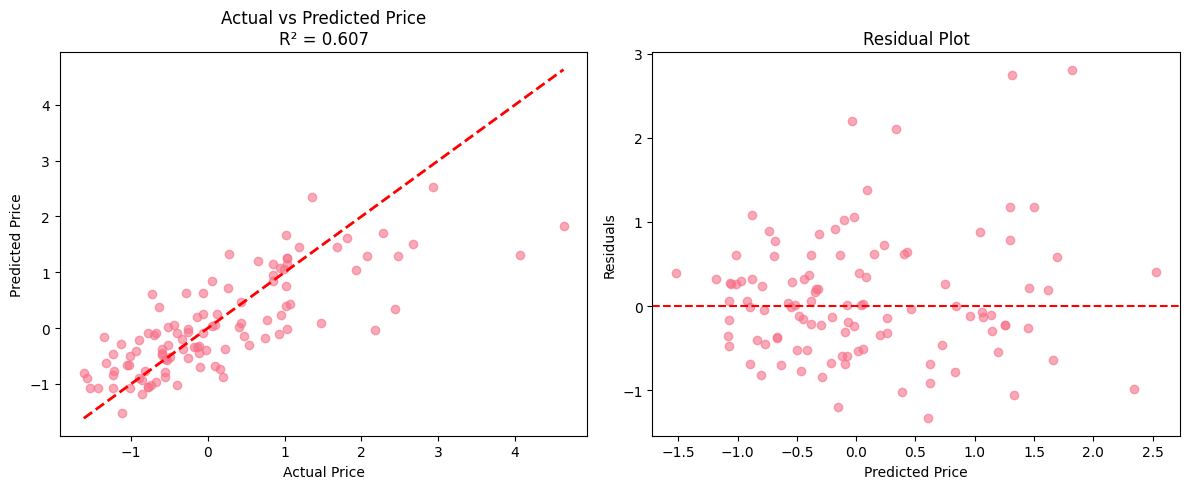


=== TOP 10 MOST IMPORTANT FEATURES ===
                         feature  importance
18                   size_xlarge    0.597604
17                    size_large    0.379154
2                      bathrooms    0.301866
8                airconditioning    0.290512
5                      guestroom    0.245479
4                       mainroad    0.233470
15                  luxury_score    0.214166
12  furnishingstatus_unfurnished    0.211150
3                        stories    0.208111
16                   size_medium    0.198538


In [17]:
# === MODEL RESULTS VISUALIZATION ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_test, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Actual vs Predicted Price\nR² = {test_r2:.3f}')

# Residuals
residuals = y_test - y_pred_test
axes[1].scatter(y_pred_test, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(model.coef_)
}).sort_values('importance', ascending=False)

print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance.head(10))